In [87]:
import pandas as pd
import seaborn as sns
import matplotlib as mtp
import numpy as np
import scipy as spy
import joblib as jb
import sklearn as sk
 

Se importa el csv

In [88]:
h_train = pd.read_csv("hospitalizaciones_train.csv")

In [89]:
h_train.info()
h_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


No hay valores nulos 

Se observa que el csv no tiene ningun registro nulo

In [90]:
h_train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [91]:
h_train.shape

(410000, 15)

In [92]:
print("promedio de días que los pacientes se quedan en el hospotal", h_train["Stay (in days)"].mean())
print("numero de días que mas se suelen quedar los pasientes en el hospital:", h_train["Stay (in days)"].mode()[0])

promedio de días que los pacientes se quedan en el hospotal 12.37819268292683
numero de días que mas se suelen quedar los pasientes en el hospital: 9


cantidad de pacientes que se hospedaron mas de 8 días en el hospital

In [93]:
#h_train[h_train["Stay (in days)"] > 8].count().sum()
print(len(h_train[h_train["Stay (in days)"] > 8]))

255416


cantidad de pacientes que se hospedaron hasta 8 días en el hospital

In [94]:
print(len(h_train[h_train["Stay (in days)"] <= 8]))

154584


se crea una columna, la cual separa los valores mayores y menores a 8 dias de hospitalizacion y en donde se crea la varible caterogica correspondiente 

En donde True son los pacientes que se hospitalizan menos de 8 días y False son los pacientes que se hospitalizan mas de 8 días

In [95]:
display(h_train.head())
h_train["hospitalizado_prolongado"] = h_train["Stay (in days)"] > 8

print(h_train["hospitalizado_prolongado"])


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


0         False
1          True
2         False
3         False
4          True
          ...  
409995    False
409996     True
409997     True
409998     True
409999    False
Name: hospitalizado_prolongado, Length: 410000, dtype: bool


Se crea un grafico de barras para poder observar con mayor facilidad, la cantidad de personas que se quedaron mas de 8 días en el hospital y hasta 8 días en el hospital

<AxesSubplot: >

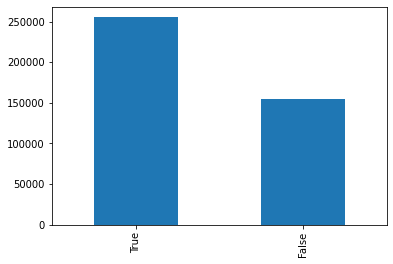

In [96]:
h_train["hospitalizado_prolongado"].value_counts().plot(kind="bar")

Se eliminan las columnas que no aportan al modelo

In [97]:
#h_train["hospitalizado_prolongado"]=h_train["hospitalizado_prolongado"].replace(True, 0)
#h_train["hospitalizado_prolongado"]=h_train["hospitalizado_prolongado"].replace(False, 1)
h_train.drop(labels = ["Available Extra Rooms in Hospital", "doctor_name", "patientid", "staff_available", "Admission_Deposit", "Insurance", "Ward_Facility_Code", "Visitors with Patient"], axis = 1, inplace = True)
h_train.head()

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Stay (in days),hospitalizado_prolongado
0,gynecology,41-50,Female,Trauma,Extreme,Diabetes,8,False
1,gynecology,31-40,Female,Trauma,Minor,Heart disease,9,True
2,gynecology,21-30,Female,Trauma,Extreme,Diabetes,7,False
3,gynecology,31-40,Female,Urgent,Moderate,None,8,False
4,anesthesia,71-80,Male,Trauma,Moderate,Diabetes,34,True


In [98]:
#def save_results_to_db(h_train):    
 #   escrito = pd.ExcelWriter(f'h_train.xlsx');
  #  h_train.to_excel(escrito, 'h_train', index=False);   escrito.save();    
   # escrito.close()
    #return 0


Distribucion de los datos. Se observa que los datos siguen una distribución normal

<AxesSubplot: xlabel='Stay (in days)', ylabel='Count'>

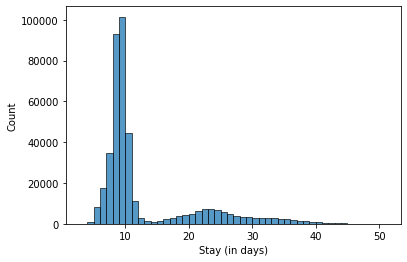

In [99]:
sns.histplot( data= h_train, x="Stay (in days)", binwidth=1)

In [100]:
import empiricaldist as emp


Probabilidad de que un paciente se quede un dia determinado. Por ejemplo se puede observar que la probabilidad de que un paciente se quede 8 días en el hospital es del 22%

In [101]:
emp.Pmf.from_seq(h_train["Stay (in days)"])

,probs
3,0.000032
4,0.002563
5,0.019556
6,0.042961
7,0.084600
8,0.227322
9,0.247654
10,0.108076
11,0.027156
12,0.006815


Probabilidad acumulada de los dias de estadía en el hospital. Poe ejemplo se puede obervar que la probabilidad de que un paciente se quede hasta 8 días en el hospital es del 37%

In [102]:
emp.Cdf.from_seq(h_train["Stay (in days)"])

,probs
3,0.000032
4,0.002595
5,0.022151
6,0.065112
7,0.149712
8,0.377034
9,0.624688
10,0.732763
11,0.759920
12,0.766734


<AxesSubplot: xlabel='Age', ylabel='Stay (in days)'>

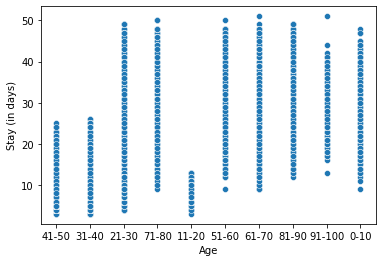

In [103]:
sns.scatterplot(data=h_train, x="Age", y = "Stay (in days)" )

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Stay (in days),hospitalizado_prolongado
0,gynecology,41-50,Female,Trauma,Extreme,Diabetes,8,False
1,gynecology,31-40,Female,Trauma,Minor,Heart disease,9,True
2,gynecology,21-30,Female,Trauma,Extreme,Diabetes,7,False
3,gynecology,31-40,Female,Urgent,Moderate,None,8,False
4,anesthesia,71-80,Male,Trauma,Moderate,Diabetes,34,True


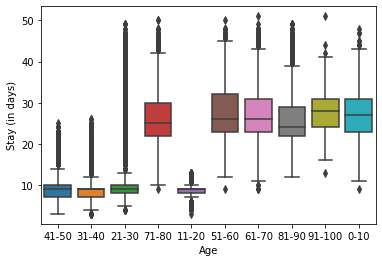

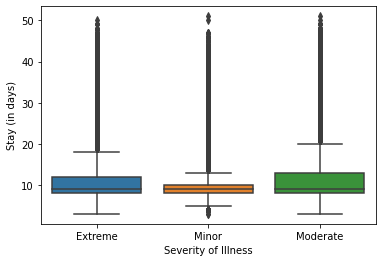

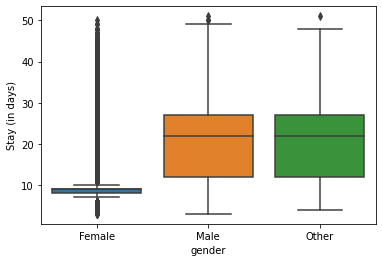

In [104]:
import matplotlib.pyplot as plt
#print(h_train.head())
display(h_train.head())
sns.boxplot(data=h_train, x="Age", y="Stay (in days)")
plt.show()
sns.boxplot(data=h_train, x="Severity of Illness", y="Stay (in days)")
plt.show()
sns.boxplot(data=h_train, x="gender", y="Stay (in days)")
plt.show()

In [105]:
# Tabla de contingencia class / survived
display(pd.crosstab(index=h_train['hospitalizado_prolongado'],
            columns=h_train['Severity of Illness'], margins=True))


# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=h_train['hospitalizado_prolongado'], columns=h_train['Severity of Illness']).apply(lambda r: r/r.sum() *100,
                                axis=0)

Severity of Illness,Extreme,Minor,Moderate,All
hospitalizado_prolongado,,,,
False,26522,43979,84083,154584
True,44762,63918,146736,255416
All,71284,107897,230819,410000


Severity of Illness,Extreme,Minor,Moderate
hospitalizado_prolongado,,,
False,37.206105,40.760169,36.42811
True,62.793895,59.239831,63.57189


In [106]:
display(pd.crosstab(index=h_train['hospitalizado_prolongado'],
            columns=h_train['gender'], margins=True))

# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=h_train['hospitalizado_prolongado'], columns=h_train['gender']).apply(lambda r: r/r.sum() *100,
                                axis=0)

gender,Female,Male,Other,All
hospitalizado_prolongado,,,,
False,131172,19600,3812,154584
True,168330,73005,14081,255416
All,299502,92605,17893,410000


gender,Female,Male,Other
hospitalizado_prolongado,,,
False,43.796703,21.165164,21.304421
True,56.203297,78.834836,78.695579


Se cambian todos los tipos de datos de categoricos a numericos

In [107]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

h_train_Cod = pd.DataFrame(index = h_train.index)

# Creamos el codificador indicandole el orden de la variables
#encoder = OrdinalEncoder(categories=[["Female", "Male", "Other"]])

# Ajustamos el codificador con la variable education y la transformamos
'''
encoder = OrdinalEncoder()
encoder.fit(h_train[["gender"]])
h_train_Cod["gender-encoded"] = encoder.transform(h_train[["gender"]])
'''

#encoder = OrdinalEncoder(categories=[["gynecology", "Male", "Other"]])
#encoder = OrdinalEncoder()
for label in h_train.columns:
    print(label + "-encoded")
    #label = "Severity of Illness-encoded"
    encoder.fit(h_train[[label]])
    h_train_Cod[label + "-encoded"] = encoder.transform(h_train[[label]])

display(h_train)
display(h_train_Cod)
#display(h_train_Cod.corr())
#save_results_to_db(h_train_Cod)
#h_train_Cod.to_csv(f'h_train_Cod.csv', sep = ";", decimal = ",", index=True)



Department-encoded
Age-encoded
gender-encoded
Type of Admission-encoded
Severity of Illness-encoded
health_conditions-encoded
Stay (in days)-encoded
hospitalizado_prolongado-encoded


,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Stay (in days),hospitalizado_prolongado
0,gynecology,41-50,Female,Trauma,Extreme,Diabetes,8,False
1,gynecology,31-40,Female,Trauma,Minor,Heart disease,9,True
2,gynecology,21-30,Female,Trauma,Extreme,Diabetes,7,False
3,gynecology,31-40,Female,Urgent,Moderate,None,8,False
4,anesthesia,71-80,Male,Trauma,Moderate,Diabetes,34,True
...,...,...,...,...,...,...,...,...
409995,gynecology,31-40,Female,Trauma,Minor,Asthama,8,False
409996,gynecology,21-30,Female,Trauma,Extreme,Other,9,True
409997,gynecology,21-30,Female,Emergency,Minor,Asthama,9,True
409998,gynecology,21-30,Female,Trauma,Moderate,Other,9,True


,Department-encoded,Age-encoded,gender-encoded,Type of Admission-encoded,Severity of Illness-encoded,health_conditions-encoded,Stay (in days)-encoded,hospitalizado_prolongado-encoded
0,2.0,4.0,0.0,1.0,0.0,1.0,5.0,0.0
1,2.0,3.0,0.0,1.0,1.0,2.0,6.0,1.0
2,2.0,2.0,0.0,1.0,0.0,1.0,4.0,0.0
3,2.0,3.0,0.0,2.0,2.0,4.0,5.0,0.0
4,1.0,7.0,1.0,1.0,2.0,1.0,31.0,1.0
...,...,...,...,...,...,...,...,...
409995,2.0,3.0,0.0,1.0,1.0,0.0,5.0,0.0
409996,2.0,2.0,0.0,1.0,0.0,5.0,6.0,1.0
409997,2.0,2.0,0.0,0.0,1.0,0.0,6.0,1.0
409998,2.0,2.0,0.0,1.0,2.0,5.0,6.0,1.0


Correlación de los datos

<AxesSubplot: >

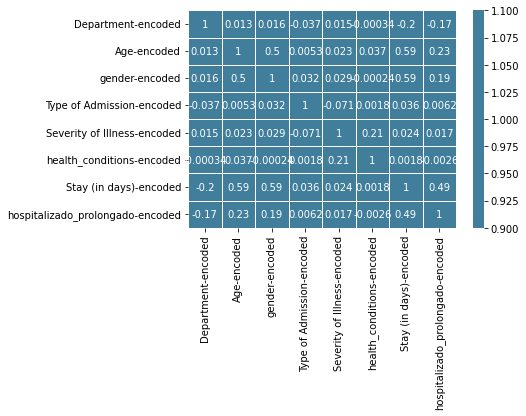

In [108]:
sns.heatmap(data=h_train_Cod.corr(), cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, vmin=1, vmax=1, linewidths=0.5, annot=True)

In [109]:
h_train_Cod.drop(labels = ["Stay (in days)-encoded", "gender-encoded"], axis = 1, inplace = True) 
h_train_Cod.head()

,Department-encoded,Age-encoded,Type of Admission-encoded,Severity of Illness-encoded,health_conditions-encoded,hospitalizado_prolongado-encoded
0,2.0,4.0,1.0,0.0,1.0,0.0
1,2.0,3.0,1.0,1.0,2.0,1.0
2,2.0,2.0,1.0,0.0,1.0,0.0
3,2.0,3.0,2.0,2.0,4.0,0.0
4,1.0,7.0,1.0,2.0,1.0,1.0


In [144]:
#X = h_train_Cod[['Department-encoded', 'Age-encoded']]  # Denotamos X con mayúscula ya que 
                                                     # incluye más de un atributo
X = h_train_Cod.drop(labels = ["hospitalizado_prolongado-encoded"], axis = 1) 
y = h_train_Cod['hospitalizado_prolongado-encoded'] # Etiqueta a predecir

In [145]:
X.head()

,Department-encoded,Age-encoded,Type of Admission-encoded,Severity of Illness-encoded,health_conditions-encoded
0,2.0,4.0,1.0,0.0,1.0
1,2.0,3.0,1.0,1.0,2.0
2,2.0,2.0,1.0,0.0,1.0
3,2.0,3.0,2.0,2.0,4.0
4,1.0,7.0,1.0,2.0,1.0


In [146]:
y.tail()

409995    0.0
409996    1.0
409997    1.0
409998    1.0
409999    0.0
Name: hospitalizado_prolongado-encoded, dtype: float64

In [147]:
'''
1. Árbol de decisión
Ahora que tenemos nuestras variables predictoras X, por un lado, y nuestra varible a predecir y, por el otro, vamos a crear un modelo de árbol de decisión.

Recordemos el flujo de trabajo de ML en Scikit-Learn: creamos el modelo / entrenamos / predecimos.
'''

from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 30, random_state = 42)

'''
Notar que establecimos max_depth en 3.

Esto es un hiperparámtro que define la profundidad que tendrá nuestro árbol, es decir, 
cuántos niveles de preguntas hará hasta que llegue a una hoja donde asigne una etiqueta.

A continuación, esquematizamos la profundidad de un árbol:


A, B, C, etc. representan las preguntas que va haciendo el árbol en cada subdivisión por sus ramas. 
En efecto, cada vez que baja un nivel, aumenta su profundidad.
'''


'\nNotar que establecimos max_depth en 3.\n\nEsto es un hiperparámtro que define la profundidad que tendrá nuestro árbol, es decir, \ncuántos niveles de preguntas hará hasta que llegue a una hoja donde asigne una etiqueta.\n\nA continuación, esquematizamos la profundidad de un árbol:\n\n\nA, B, C, etc. representan las preguntas que va haciendo el árbol en cada subdivisión por sus ramas. \nEn efecto, cada vez que baja un nivel, aumenta su profundidad.\n'

In [148]:
# Entrenamos el modelo

clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [149]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, 
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0. 1.]
2
5
[0.31236538 0.67995985 0.00331007 0.00258085 0.00178385]


In [150]:
y_pred = clf.predict(X.values)

In [151]:
'''
Ahora evaluaremos nuestro modelo de clasificación. No te preocupes, 
la próxima clase veremos más en profundiad cada una de las métricas existentes para los problemas de clasificación. 
Un adelanto: existe algo llamado matriz de confusión, 
que tiene una serie de métricas muy importantes, entre ellas la precisión (acurracy).
'''

from sklearn.metrics import accuracy_score

print(f"Accuracy_score: {round(accuracy_score(y,y_pred),4)*100}%")

Accuracy_score: 68.96%


In [152]:
from sklearn.metrics import recall_score

precision = recall_score(y, y_pred, average= None)
print(precision)

[0.25716116 0.95133821]


Matriz de confusión

In [133]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[ 39753, 114831],
       [ 12429, 242987]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

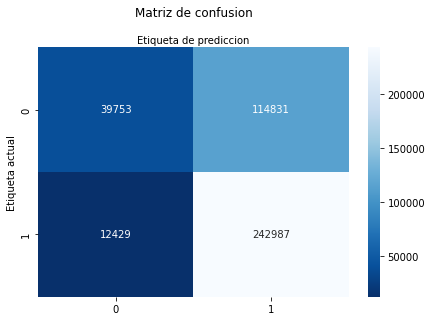

In [134]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap= "Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y= 1.1)
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de prediccion")


Modelo con Regresión Logistica

In [162]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [163]:
X = h_train_Cod.drop(labels = ["hospitalizado_prolongado-encoded"], axis = 1) 
y = h_train_Cod['hospitalizado_prolongado-encoded'] # Etiqueta a predecir

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [165]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [166]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [167]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 7781, 31083],
       [ 8272, 55364]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

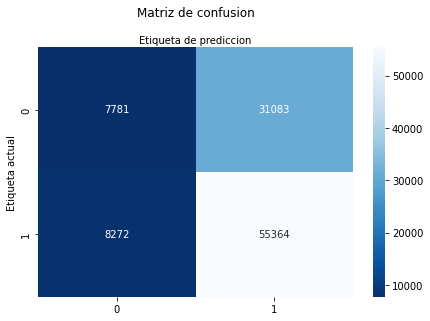

In [168]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap= "Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y= 1.1)
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de prediccion")


In [126]:
print("Exactitud ", metrics.accuracy_score(y_test, y_pred))


Exactitud  0.6160487804878049


In [142]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_pred, average= None)
print(precision)

[0.20021099 0.87001069]


Pipelines

In [153]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [156]:
pipe_regresionLogistica = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [158]:
pipe_arbol = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [159]:
pipelines = [pipe_regresionLogistica, pipe_arbol]

In [160]:
pipe_dict = {0: 'Regresión Logística', 1:'Árbol de decisión'}

In [169]:
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [170]:
for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.612
Árbol de decisión pipeline accuracy en test: 0.686


In [171]:
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión
